In [1]:
#Importing necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
import numpy as np
import cv2
import os

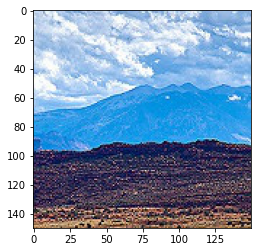

In [2]:
# Load and print the image
img = image.load_img("nature/seg_train/mountain/209.jpg")
plt.imshow(img)

In [3]:
# Dimensions of the image
cv2.imread("nature/seg_train/mountain/209.jpg").shape

(150, 150, 3)

In [4]:
#train_set is used for feature scaling and image augmentation, where image augmentation is used to avoid overfitting
train_set = ImageDataGenerator(rescale = 1.0/255,
                          shear_range = 0.2,
                          zoom_range = 0.2,
                          horizontal_flip = True)
#for the test_set only feature scaling is applied beacause by applying image augmentation for the test set can lead to leakage of testing data
test_set = ImageDataGenerator(rescale = 1.0/255)

In [5]:
#Define the training and testing path, size of the image is reduced to 150*150, batch size is 128.
#class mode is categorical because we have six different classes
train_data = train_set.flow_from_directory("nature/seg_train",
                                      target_size = (150,150),
                                      batch_size = 128,
                                      class_mode = "categorical")
valid_data = test_set.flow_from_directory("nature/seg_test",
                                      target_size = (150,150),
                                      batch_size = 128,
                                      class_mode = "categorical")

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [6]:
# Class indices of train_data
train_data.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [7]:
train_data.classes

array([0, 0, 0, ..., 5, 5, 5])

In [8]:
#Creating ANN using the relu and softmax as activation functions, using Maxpool method for pooling.
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = "relu",input_shape = (150,150,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = "relu"),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = "relu"),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(128,activation = "relu"),
                                    ##
                                    tf.keras.layers.Dense(6, activation = "softmax")
                                   ])

In [9]:
# compiling the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics= "accuracy")

In [10]:
#training the model with 10 epochs
model_fit = model.fit(train_data,
                     steps_per_epoch = len(train_data),
                     epochs = 10,
                     validation_data = valid_data)

Epoch 1/10
110/110 [==============================] - 846s 8s/step - loss: 1.3255 - accuracy: 0.4675 - val_loss: 0.8441 - val_accuracy: 0.6910
Epoch 2/10
110/110 [==============================] - 342s 3s/step - loss: 0.7628 - accuracy: 0.7219 - val_loss: 0.7098 - val_accuracy: 0.7410
Epoch 3/10
110/110 [==============================] - 342s 3s/step - loss: 0.6647 - accuracy: 0.7509 - val_loss: 0.6181 - val_accuracy: 0.7770
Epoch 4/10
110/110 [==============================] - 340s 3s/step - loss: 0.5751 - accuracy: 0.7864 - val_loss: 0.5807 - val_accuracy: 0.7960
Epoch 5/10
110/110 [==============================] - 340s 3s/step - loss: 0.5306 - accuracy: 0.8079 - val_loss: 0.5588 - val_accuracy: 0.8023
Epoch 6/10
110/110 [==============================] - 340s 3s/step - loss: 0.4867 - accuracy: 0.8203 - val_loss: 0.4744 - val_accuracy: 0.8313
Epoch 7/10
110/110 [==============================] - 342s 3s/step - loss: 0.4440 - accuracy: 0.8408 - val_loss: 0.4980 - val_accuracy: 0.8260

In [11]:
names = np.array(['Buildings', 'Forest' ,'Glacier' ,'Mountain' ,'Sea' ,'Street'])

In [14]:
#Creating a list of 10 images from seg_pred directory for the prediction
pred = os.listdir("nature/seg_pred/")
import random
images = []
for i in range(10):
    images.append("nature/seg_pred/"+random.choice(pred))

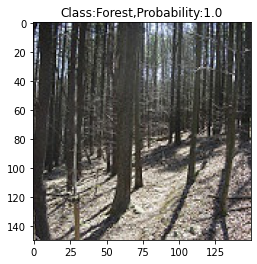

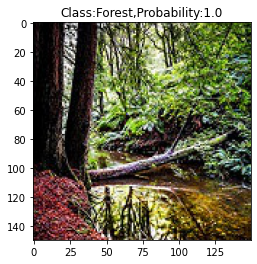

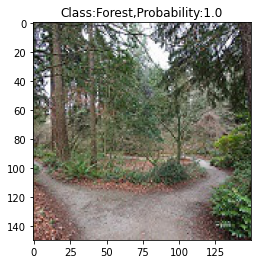

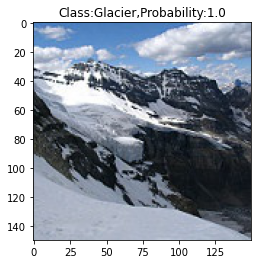

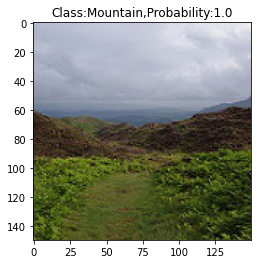

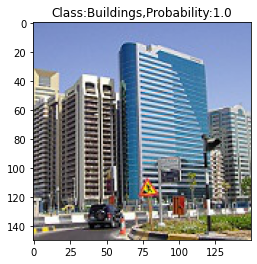

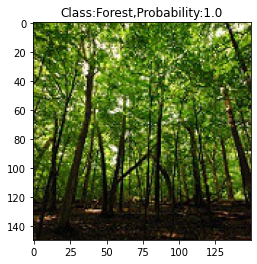

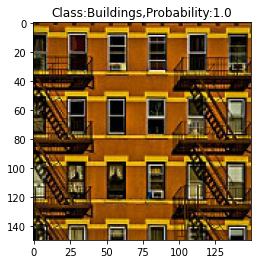

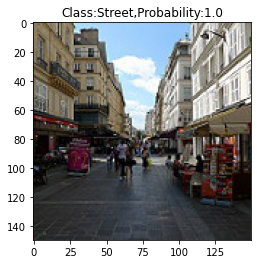

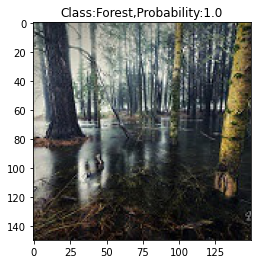

In [15]:
for img in images:
    #importing images
    test_img = image.load_img(img,target_size = (150,150))

    #converting image to array
    test_img = image.img_to_array(test_img)

    #selecting a batch size of 150 and it's a single photo, therefore we would be expanding it's dimensions.
    test_img = np.expand_dims(test_img,axis = 0)
    result = model.predict(test_img)
    plt.title('Class:{},Probability:{}'.format(names[result.argmax()],result.max()))
    
    #to print the image
    plt.imshow(image.img_to_array(image.load_img(img, target_size=(150,150)))/255.)
    plt.show()